In [1]:
# Change this to whatever your directory you're working from is - this should be
# the head level with Code and Data directories.
main_path = '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np
from keras import models
from keras import layers
from keras.layers import GRU, LSTM
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
import copy
import random as python_random
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint
from google.colab import files
import sklearn.preprocessing
import scipy

import sys
import importlib

# set seeds
np.random.seed(768)
python_random.seed(869)
tf.random.set_seed(1234)

from google.colab import drive
drive.mount('/content/drive')

sys.path.append(main_path+"Code")

# This is our library of class functions
import vep
importlib.reload(vep)

Mounted at /content/drive


<module 'vep' from '/content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/vep.py'>

In [3]:
# Let's build our model!
def biGru(model_val,window_size):
  n_features = 8
  n_timesteps = 2*window_size + 1

  # Let's make our bi-directional GRU-based model
  model_gru = models.Sequential()
  model_gru.add(layers.Bidirectional(GRU(10, activation='relu', input_shape=(n_timesteps,n_features),kernel_regularizer=regularizers.L2(l2=0.00005))))
  model_gru.add(layers.Dense(5,activation='relu'))
  model_gru.add(layers.Dense(2, activation='softmax')) 
 
  nepochs = 200

  model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics='categorical_accuracy')

  history = model_gru.fit(model_val.X_train, model_val.Y_train,
          epochs=nepochs,
          batch_size=512,
          validation_data=(model_val.X_val, model_val.Y_val)
  )

  print(model_gru.summary())

  # Store our model and history
  model_val.nn_model = model_gru
  model_val.nn_history = history 

##Case 1: Let's run on our more stringent test/train split

In [4]:
# Let's load our train and validate sets for our clustered set 
# (no sequences shared between train/test)
data_dir = main_path+'Data/'
default_window_size = 6
train_file = data_dir+'train_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_with_clusters_clustershuffle.csv'
test_file = data_dir+'test_processed_clinvar_seqs_with_clusters_clustershuffle.csv'

# Initiate an instance of my Model2 class
m2 = vep.Model2(data_dir+'precursor_files/amino_acid_properties.csv')

# Process our input and output data
m2.process_input_and_output_training(train_file,val_file,test_file,window_size=default_window_size,return_out=False)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [5]:
# Let's run our bi-directional GRU model!
biGru(m2,default_window_size)

Epoch 1/200
10/10 [==============================] - 4s 72ms/step - loss: 0.6984 - categorical_accuracy: 0.5404 - val_loss: 0.6345 - val_categorical_accuracy: 0.6768
Epoch 2/200
10/10 [==============================] - 0s 20ms/step - loss: 0.6683 - categorical_accuracy: 0.6145 - val_loss: 0.6357 - val_categorical_accuracy: 0.6768
Epoch 3/200
10/10 [==============================] - 0s 22ms/step - loss: 0.6667 - categorical_accuracy: 0.6145 - val_loss: 0.6445 - val_categorical_accuracy: 0.6768
Epoch 4/200
10/10 [==============================] - 0s 21ms/step - loss: 0.6647 - categorical_accuracy: 0.6145 - val_loss: 0.6328 - val_categorical_accuracy: 0.6768
Epoch 5/200
10/10 [==============================] - 0s 21ms/step - loss: 0.6620 - categorical_accuracy: 0.6145 - val_loss: 0.6245 - val_categorical_accuracy: 0.6768
Epoch 6/200
10/10 [==============================] - 0s 20ms/step - loss: 0.6597 - categorical_accuracy: 0.6145 - val_loss: 0.6215 - val_categorical_accuracy: 0.6768
Epoc

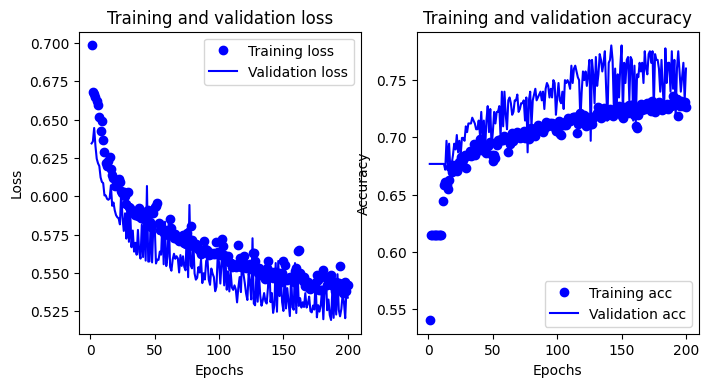

In [6]:
# Plot training and validate loss and accuracy
m2.plot_accuracy_and_loss()

In [7]:
# Get our loss and accuracy for our test set
m2.nn_model.evaluate(m2.X_test,m2.Y_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.6623 - categorical_accuracy: 0.6718


[0.6622518301010132, 0.6718266010284424]

In [8]:
# Save model
m2.nn_model.save(main_path+'Code/Trained_Model_Weights/Model2_clustered')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/Trained_Model_Weights/Model2_clustered/assets


## Case 2: Let's look at a split where the model might have seen the sequence before (but not the specific mutations for those sequences)

In [9]:
# Let's load our train and validate sets for our clustered set 
# (no sequences shared between train/test)
data_dir = main_path+'Data/'
default_window_size = 6
train_file = data_dir+'train_processed_clinvar_seqs_random.csv'
val_file = data_dir+'validate_processed_clinvar_seqs_random.csv'
test_file = data_dir+'test_processed_clinvar_seqs_random.csv'

# Initiate an instance of my Model2 class
m2_rand = vep.Model2(data_dir+'precursor_files/amino_acid_properties.csv')

# Process our input and output data
m2_rand.process_input_and_output_training(train_file,val_file,test_file,window_size=default_window_size,return_out=False)

The categories are: [array(['benign', 'pathogenic'], dtype='<U10')]


In [10]:
# Run our bi-directional GRU!
biGru(m2_rand,default_window_size)

Epoch 1/200
10/10 [==============================] - 3s 68ms/step - loss: 0.6711 - categorical_accuracy: 0.6213 - val_loss: 0.6674 - val_categorical_accuracy: 0.6123
Epoch 2/200
10/10 [==============================] - 0s 21ms/step - loss: 0.6608 - categorical_accuracy: 0.6213 - val_loss: 0.6594 - val_categorical_accuracy: 0.6123
Epoch 3/200
10/10 [==============================] - 0s 21ms/step - loss: 0.6539 - categorical_accuracy: 0.6217 - val_loss: 0.6462 - val_categorical_accuracy: 0.6123
Epoch 4/200
10/10 [==============================] - 0s 22ms/step - loss: 0.6423 - categorical_accuracy: 0.6289 - val_loss: 0.6270 - val_categorical_accuracy: 0.6591
Epoch 5/200
10/10 [==============================] - 0s 21ms/step - loss: 0.6311 - categorical_accuracy: 0.6498 - val_loss: 0.6128 - val_categorical_accuracy: 0.6624
Epoch 6/200
10/10 [==============================] - 0s 23ms/step - loss: 0.6258 - categorical_accuracy: 0.6481 - val_loss: 0.6094 - val_categorical_accuracy: 0.6882
Epoc

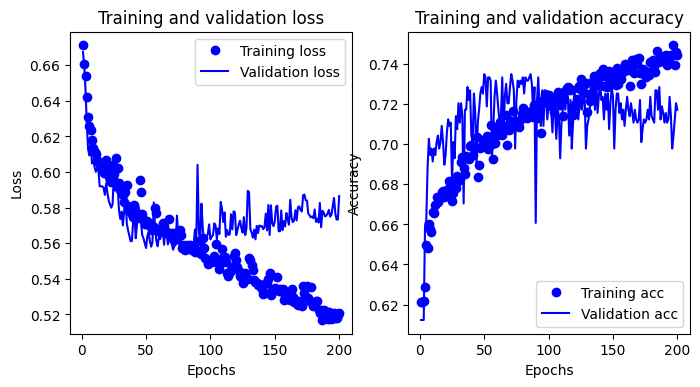

In [11]:
# Plot train and validate loss and accuracy
m2_rand.plot_accuracy_and_loss()

In [12]:
# Get our loss and accuracy for our test set
m2_rand.nn_model.evaluate(m2_rand.X_test,m2_rand.Y_test)

19/19 [==============================] - 0s 4ms/step - loss: 0.5987 - categorical_accuracy: 0.6774


[0.5986503958702087, 0.6774193644523621]

In [13]:
m2_rand.nn_model.save(main_path+'Code/Trained_Model_Weights/Model2_random')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/Trained_Model_Weights/Model2_random/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning_Summer2022/Final_Project/Code/Trained_Model_Weights/Model2_random/assets
